In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
tr_data = pd.read_csv('fashion-mnist_train.csv')
ts_data = pd.read_csv('fashion-mnist_test.csv')

In [4]:
tr_data.head()


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
train_data = tr_data.drop(columns='label').values
train_labels = tr_data.label.values
test_data = ts_data.drop(columns='label').values
test_labels = ts_data.label.values

In [6]:
train_labels.shape


(60000,)

In [122]:
def display_image(pixels, width=28, height=28, title=None):
    image = np.array(pixels).reshape((height, width))
    plt.figure(figsize=(1, 1))
    plt.imshow(image, cmap='Greens')
    if title:
        plt.title(title)
    plt.axis('off')
    plt.show()

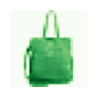

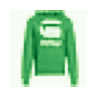

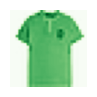

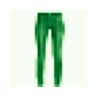

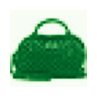

In [123]:
display_image(train_data[20000], width=28, height=28)
display_image(train_data[10000], width=28, height=28)
display_image(train_data[30000], width=28, height=28)
display_image(train_data[43400], width=28, height=28)
display_image(train_data[33300], width=28, height=28)

In [33]:
train_data = train_data/255
test_data = test_data/255

In [34]:
# the sigmoid function 
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [35]:
# cross-entropy cost with regularization
def compute_cost(X, y, w, b, lambda_=1):
    m, n = X.shape
    f = sigmoid(X@w + b)
    loss = np.dot(-y, np.log(f)) - np.dot((1-y), np.log(1-f))
    reg_cost = np.sum((w**2) * (lambda_/(2*m)))
    total_cost = np.sum(loss)/m + reg_cost
    return total_cost   #scalar cost

In [36]:
# computing the gradient with regularization
def compute_gradient(X, y, w, b, lambda_=1):
    m, n = X.shape
    f = sigmoid(X@w + b)
    dj_dw = np.dot((f - y), X) + w*lambda_/m
    dj_db = np.sum(f-y)
    return dj_db/m, dj_dw/m

In [37]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters, lambda_):
    m = len(X)
    for i in range(num_iters):
        dj_db, dj_dw = gradient_function(X, y, w_in, b_in, lambda_)
        w_in = w_in - alpha * dj_dw
        b_in = b_in - alpha * dj_db
    return w_in, b_in

In [110]:
iterations = 1500
alpha = .4
lambda_ = 0.1
initial_b = 1.
initial_w = np.zeros(train_data.shape[1])

In [111]:
classifiers = []

for class_label in range(10):
    y_binary = np.where(train_labels == class_label, 1, 0)
    w, b = gradient_descent(train_data, y_binary, initial_w, initial_b, compute_cost, compute_gradient, alpha, iterations, lambda_)
    classifiers.append((w, b))

In [112]:
def predict_class_ovr(input_example, classifiers):
    scores = []
    for classifier in classifiers:
        w, b = classifier
        score = sigmoid(input_example @ w + b)  
        scores.append(score)
    predicted_class = np.argmax(scores)  
    return predicted_class

ovr_predictions = np.array([predict_class_ovr(example, classifiers) for example in test_data])

correct_predictions = np.sum(ovr_predictions == test_labels)
total_examples = len(test_labels)
accuracy = (correct_predictions / total_examples) * 100
print("Accuracy:", accuracy, "%")

Accuracy: 84.47 %
